In [1]:
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
from pprint import pprint
from random import randint
import numpy as np
#import matplotlib as mpl
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))
set1 = cm.get_cmap(plt.get_cmap('Set1'))
tab20 = cm.get_cmap(plt.get_cmap('tab20'))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

In [7]:
StHomoCampaigns_4DynFixedHomoResources = pd.read_csv('../Data/StHomoCampaigns_4DynFixedHomoResources.csv')

StHomoCampaigns_4DynFixedHomoResources = StHomoCampaigns_4DynFixedHomoResources.groupby(by=['planner','size'])
StHomoCampaigns_4DynFixedHomoResources_makespan_means = StHomoCampaigns_4DynFixedHomoResources.mean()
StHomoCampaigns_4DynFixedHomoResources_makespan_stds = StHomoCampaigns_4DynFixedHomoResources.std()

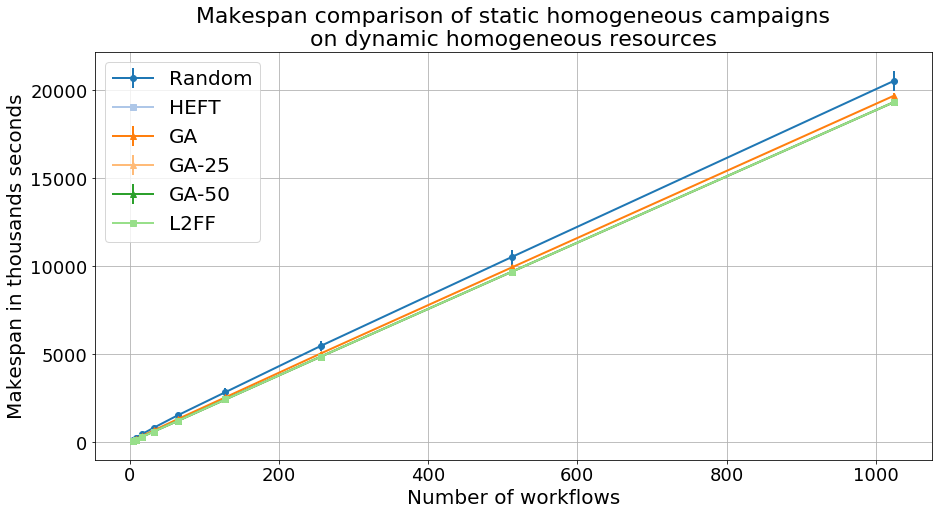

In [8]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(StHomoCampaigns_4DynFixedHomoResources_makespan_means.xs('RANDOM').index, StHomoCampaigns_4DynFixedHomoResources_makespan_means.xs('RANDOM')['makespan'].values,StHomoCampaigns_4DynFixedHomoResources_makespan_stds.xs('RANDOM')['makespan'].values, color=tab20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynFixedHomoResources_makespan_means.xs('HEFT').index,StHomoCampaigns_4DynFixedHomoResources_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT', color=tab20(1),linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynFixedHomoResources_makespan_means.xs('GA').index, StHomoCampaigns_4DynFixedHomoResources_makespan_means.xs('GA')['makespan'].values,StHomoCampaigns_4DynFixedHomoResources_makespan_stds.xs('GA')['makespan'].values, color=tab20(2),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynFixedHomoResources_makespan_means.xs('GA25').index, StHomoCampaigns_4DynFixedHomoResources_makespan_means.xs('GA25')['makespan'].values,StHomoCampaigns_4DynFixedHomoResources_makespan_stds.xs('GA25')['makespan'].values, color=tab20(3),marker='^',label='GA-25',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynFixedHomoResources_makespan_means.xs('GA50').index, StHomoCampaigns_4DynFixedHomoResources_makespan_means.xs('GA50')['makespan'].values,StHomoCampaigns_4DynFixedHomoResources_makespan_stds.xs('GA50')['makespan'].values, color=tab20(4),marker='^',label='GA-50',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynFixedHomoResources_makespan_means.xs('L2FF').index,StHomoCampaigns_4DynFixedHomoResources_makespan_means.xs('L2FF')['makespan'].values,marker='s',label='L2FF', color=tab20(5),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
# _ = axis.set_yscale('symlog')
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.set_title('Makespan comparison of static homogeneous campaigns\non dynamic homogeneous resources', fontsize=22)
_ = axis.legend(fontsize=20)
#fig.savefig('StHomoCampaigns_4StHomoResources.png',bbox_inches='tight')
#fig.savefig('StHomoCampaigns_4DyHomoResources.pdf',bbox_inches='tight')

In [17]:
StHomoCampaigns_4DynHomoResources_makespan_means

makespan      time
planner size                        
GA      4     8.841551e+04  0.003931
        8     1.852850e+05  0.015390
        16    3.609490e+05  0.044365
        32    6.792803e+05  0.092892
        64    1.309532e+06  0.154517
        128   2.555104e+06  0.328351
        256   5.014238e+06  0.775962
        512   9.913204e+06  2.228853
        1024  1.970128e+07  7.296091
GA25    4     8.052578e+04  0.000565
        8     1.586810e+05  0.000748
        16    3.154733e+05  0.002571
        32    6.160438e+05  0.001893
        64    1.226874e+06  0.003447
        128   2.438110e+06  0.006848
        256   4.861884e+06  0.014769
        512   9.699506e+06  0.035834
        1024  1.935778e+07  0.095331
GA50    4     8.068751e+04  0.000567
        8     1.575651e+05  0.000730
        16    3.115234e+05  0.001082
        32    6.156763e+05  0.001850
        64    1.226314e+06  0.003455
        128   2.437579e+06  0.006821
        256   4.860404e+06  0.014925
        512   9.697431e+06  0.036947
        1024  1.935850e+07  0.101789
HEFT    4     8.026174e+04  0.000027
        8     1.571272e+05  0.000036
        16    3.122577e+05  0.000062
        32    6.172455e+05  0.000101
        64    1.228185e+06  0.000213
        128   2.439934e+06  0.000374
        256   4.865402e+06  0.001141
        512   9.701575e+06  0.002537
        1024  1.935882e+07  0.004152
L2FF    4     8.060292e+04  0.000022
        8     1.583000e+05  0.000027
        16    3.121052e+05  0.000043
        32    6.163341e+05  0.000067
        64    1.222914e+06  0.000132
        128   2.441453e+06  0.000245
        256   4.857933e+06  0.000980
        512   9.701310e+06  0.001485
        1024  1.936553e+07  0.002369
RANDOM  4     1.539619e+05  0.000030
        8     2.628719e+05  0.000044
        16    4.507211e+05  0.000063
        32    8.490450e+05  0.000122
        64    1.546921e+06  0.000241
        128   2.849747e+06  0.000360
        256   5.482831e+06  0.000913
        512   1.051742e+07  0.001541
        1024  2.051262e+07  0.003045

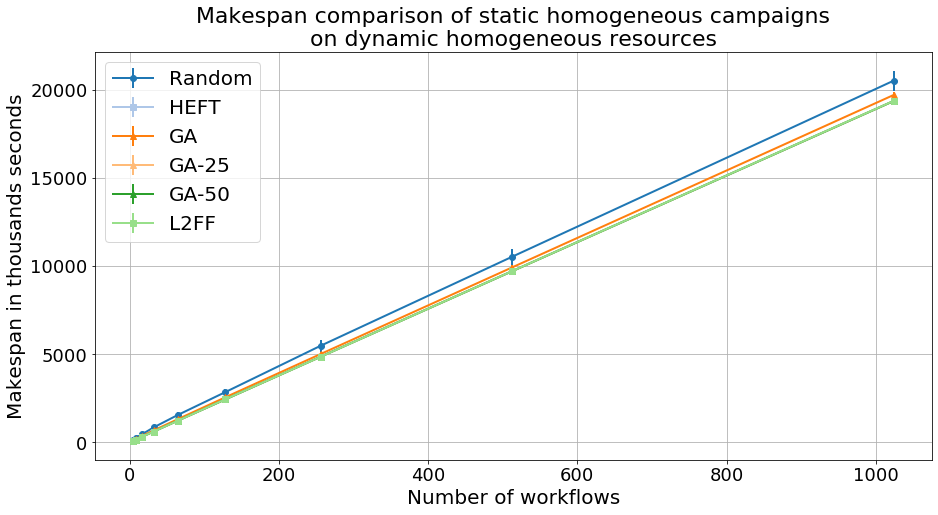

In [20]:
StHomoCampaigns_4DynHomoResources = pd.read_csv('../Data/StHomoCampaigns_4DynHomoResources.csv')

StHomoCampaigns_4DynHomoResources = StHomoCampaigns_4DynHomoResources.groupby(by=['planner','size'])
StHomoCampaigns_4DynHomoResources_makespan_means = StHomoCampaigns_4DynHomoResources.mean()
StHomoCampaigns_4DynHomoResources_makespan_stds = StHomoCampaigns_4DynHomoResources.std()

fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM')['makespan'].values,StHomoCampaigns_4DynHomoResources_makespan_stds.xs('RANDOM')['makespan'].values, color=tab20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynHomoResources_makespan_means.xs('HEFT').index,StHomoCampaigns_4DynHomoResources_makespan_means.xs('HEFT')['makespan'].values,StHomoCampaigns_4DynHomoResources_makespan_stds.xs('HEFT')['makespan'].values, marker='s',label='HEFT', color=tab20(1),linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA').index, StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA')['makespan'].values,StHomoCampaigns_4DynHomoResources_makespan_stds.xs('GA')['makespan'].values, color=tab20(2),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA25').index, StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA25')['makespan'].values,StHomoCampaigns_4DynHomoResources_makespan_stds.xs('GA25')['makespan'].values, color=tab20(3),marker='^',label='GA-25',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA50').index, StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA50')['makespan'].values,StHomoCampaigns_4DynHomoResources_makespan_stds.xs('GA50')['makespan'].values, color=tab20(4),marker='^',label='GA-50',linewidth=2)
_ = axis.errorbar(StHomoCampaigns_4DynHomoResources_makespan_means.xs('L2FF').index,StHomoCampaigns_4DynHomoResources_makespan_means.xs('L2FF')['makespan'].values,StHomoCampaigns_4DynHomoResources_makespan_stds.xs('L2FF')['makespan'].values,marker='s',label='L2FF', color=tab20(5),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
# _ = axis.set_yscale('symlog')
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.set_title('Makespan comparison of static homogeneous campaigns\non dynamic homogeneous resources', fontsize=22)
_ = axis.legend(fontsize=20)
#fig.savefig('StHomoCampaigns_4StHomoResources.png',bbox_inches='tight')
#fig.savefig('StHomoCampaigns_4DyHomoResources.pdf',bbox_inches='tight')

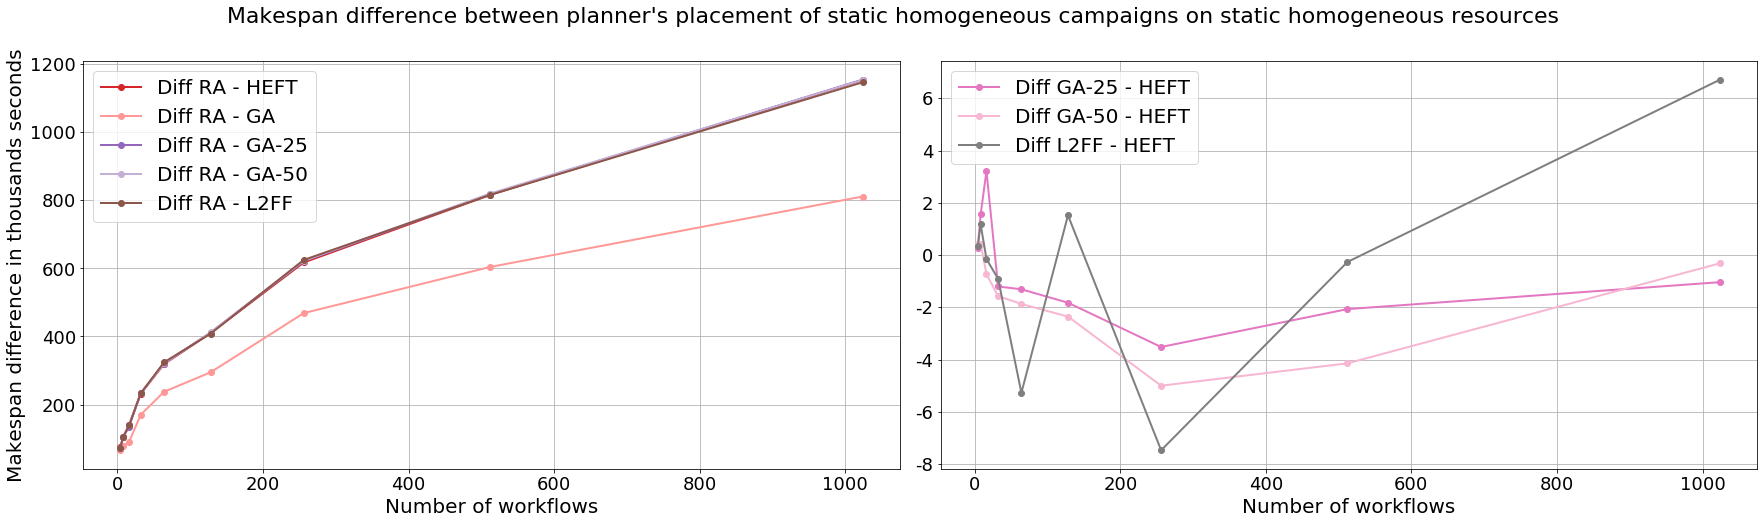

In [28]:
DiffStHomoCamp_4StHomoResHE = abs(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM')['makespan'].values - StHomoCampaigns_4DynHomoResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHomoCamp_4StHomoResGA = abs(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM')['makespan'].values - StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA')['makespan'].values)
DiffStHomoCamp_4StHomoResGA25 = abs(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM')['makespan'].values - StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA25')['makespan'].values)
DiffStHomoCamp_4StHomoResGA50 = abs(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM')['makespan'].values - StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA50')['makespan'].values)
DiffStHomoCamp_4StHomoResL2 = abs(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM')['makespan'].values - StHomoCampaigns_4DynHomoResources_makespan_means.xs('L2FF')['makespan'].values)

DiffStHomoCamp_4StHomoResHEGA = (StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA')['makespan'].values - StHomoCampaigns_4DynHomoResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHomoCamp_4StHomoResHEGA25 = (StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA25')['makespan'].values - StHomoCampaigns_4DynHomoResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHomoCamp_4StHomoResHEGA50 = (StHomoCampaigns_4DynHomoResources_makespan_means.xs('GA50')['makespan'].values - StHomoCampaigns_4DynHomoResources_makespan_means.xs('HEFT')['makespan'].values)
DiffStHomoCamp_4StHomoResHEL2 = (StHomoCampaigns_4DynHomoResources_makespan_means.xs('L2FF')['makespan'].values - StHomoCampaigns_4DynHomoResources_makespan_means.xs('HEFT')['makespan'].values)

fig,axis = plt.subplots(nrows=1,ncols=2,figsize=(30,7.5), sharex=True)
fig.subplots_adjust(wspace=0.05, hspace=0.05)
_ = axis[0].plot(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHE, marker='o',linewidth=2, label='Diff RA - HEFT', color=tab20(6))
_ = axis[0].plot(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA, marker='o',linewidth=2, label='Diff RA - GA', color=tab20(7))
_ = axis[0].plot(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA25, marker='o',linewidth=2, label='Diff RA - GA-25', color=tab20(8))
_ = axis[0].plot(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA50, marker='o',linewidth=2, label='Diff RA - GA-50', color=tab20(9))
_ = axis[0].plot(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResL2, marker='o',linewidth=2, label='Diff RA - L2FF', color=tab20(10))

#_ = axis[1].plot(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA, marker='o',linewidth=2, label='Diff GA - HEFT', color=tab20(11))
_ = axis[1].plot(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA25, marker='o',linewidth=2, label='Diff GA-25 - HEFT', color=tab20(12))
_ = axis[1].plot(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA50, marker='o',linewidth=2, label='Diff GA-50 - HEFT', color=tab20(13))
_ = axis[1].plot(StHomoCampaigns_4DynHomoResources_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEL2, marker='o',linewidth=2, label='Diff L2FF - HEFT', color=tab20(14))
#_ = axis.set_yscale('symlog')
_ = axis[0].set_ylabel('Makespan difference in thousands seconds',fontsize=20)
_ = axis[0].set_xlabel('Number of workflows',fontsize=20)
_ = axis[0].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[0].set_yticklabels((axis[0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[0].grid('on')
_ = axis[0].legend(fontsize=20)

_ = axis[1].set_xlabel('Number of workflows',fontsize=20)
_ = axis[1].set_xticklabels(axis[1].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[1].set_yticklabels((axis[1].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[1].grid('on')
_ = axis[1].legend(fontsize=20)
_ = fig.suptitle("Makespan difference between planner's placement of static homogeneous campaigns on static homogeneous resources", fontsize=22)
#fig.savefig('StHomoCampaigns_4StHomoResources_diff.png',bbox_inches='tight')
#fig.savefig('StHomoCampaigns_4StHomoResources_diff.pdf',bbox_inches='tight')

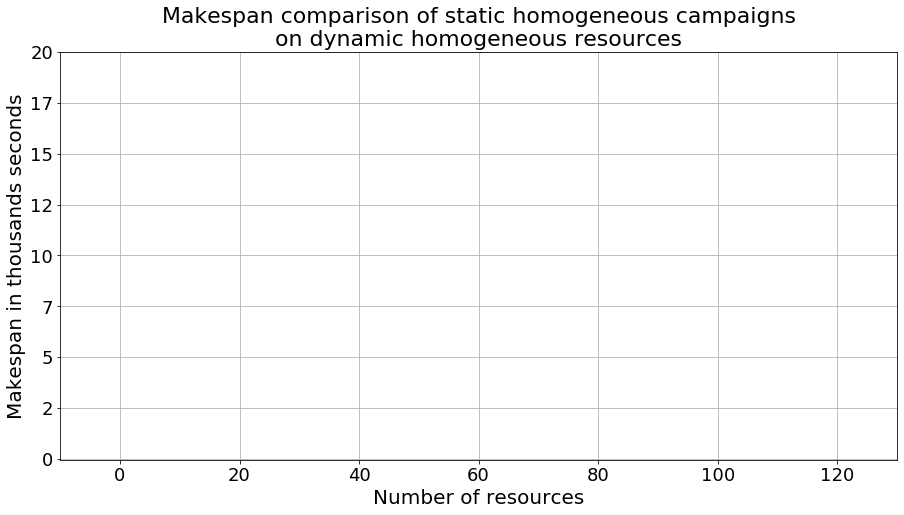

In [5]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))

_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_ylim([-50,20000])
_ = axis.set_xlim([-10,130])
_ = axis.set_xticks([0,20,40,60,80,100, 120])
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.set_title('Makespan comparison of static homogeneous campaigns\non dynamic homogeneous resources', fontsize=22)
#fig.savefig('DyHomoResources_StHomoCampaigns.pdf', bbox_inches='tight')

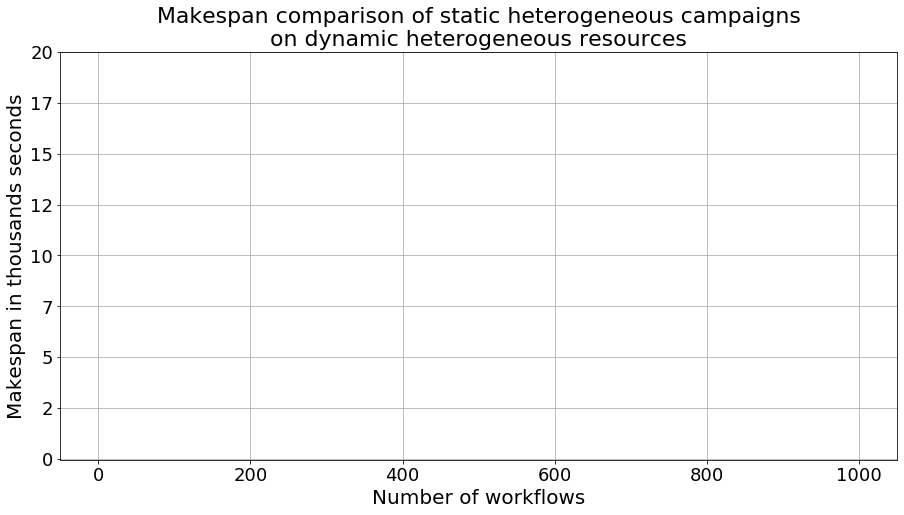

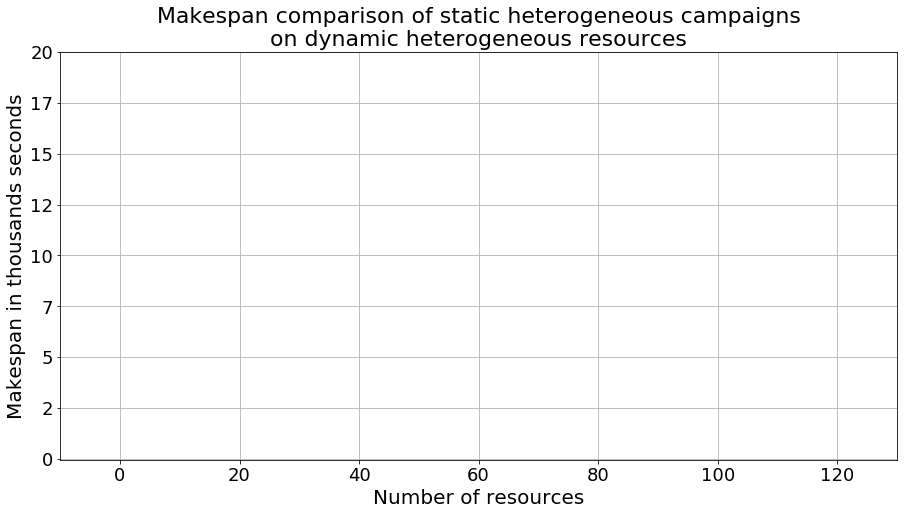

In [6]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))

_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_ylim([-50,20000])
_ = axis.set_xlim([-50,1050])
_ = axis.set_xticks([0,200,400,600,800,1000])
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.set_title('Makespan comparison of static heterogeneous campaigns\non dynamic heterogeneous resources', fontsize=22)
#fig.savefig('StHeteroCampaigns_4DyHomoResources.pdf',bbox_inches='tight')

fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))

_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_ylim([-50,20000])
_ = axis.set_xlim([-10,130])
_ = axis.set_xticks([0,20,40,60,80,100, 120])
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.set_title('Makespan comparison of static heterogeneous campaigns\non dynamic heterogeneous resources', fontsize=22)
#fig.savefig('DyHomoResources_StHeteroCampaigns.pdf', bbox_inches='tight')

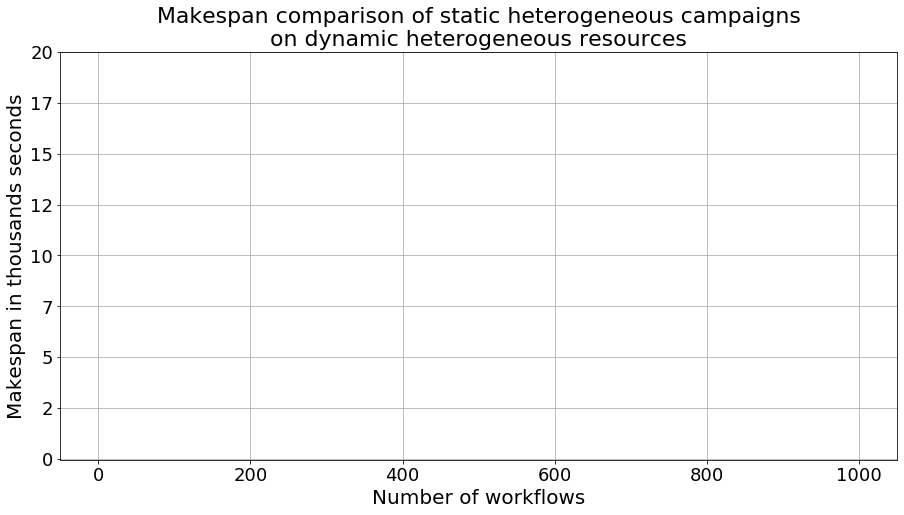

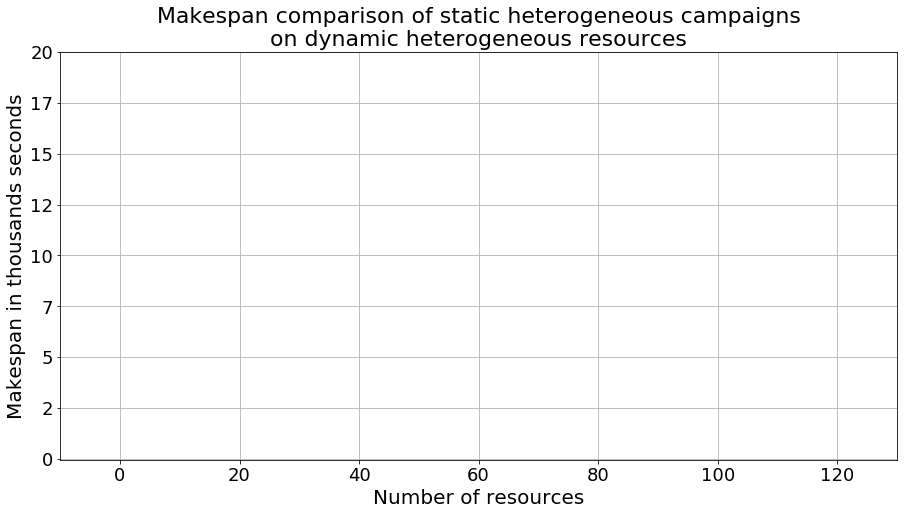

In [7]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))

_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of workflows',fontsize=20)
_ = axis.set_ylim([-50,20000])
_ = axis.set_xlim([-50,1050])
_ = axis.set_xticks([0,200,400,600,800,1000])
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.set_title('Makespan comparison of static heterogeneous campaigns\non dynamic heterogeneous resources', fontsize=22)
#fig.savefig('StHeteroCampaigns_4DyHeteroResources.pdf',bbox_inches='tight')

fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))

_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_ylim([-50,20000])
_ = axis.set_xlim([-10,130])
_ = axis.set_xticks([0,20,40,60,80,100, 120])
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.set_title('Makespan comparison of static heterogeneous campaigns\non dynamic heterogeneous resources', fontsize=22)
#fig.savefig('DyHeteroResources_StHeteroCampaigns.pdf', bbox_inches='tight')